# Benötigte imports

In [1]:
import keras as keras
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D

from readData import readData

from plotDigits import predictAndPlot, plotDigit

2024-05-27 16:13:42.133611: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Erstellung des Modells

In [2]:
# initialisierung des Modells
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(784, ),name = "first_layer"))
model.add(Dense(400, activation='relu',  name = "hidden_layer_1"))
model.add(Dense(100, activation='relu',  name = "hidden_layer_2"))
model.add(Dense(10, activation = 'softmax', name = "output_layer"))

/Users/moritzschroer/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Erstelltes Modell kompilieren

In [3]:
# kompilieren des Modells
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Einlesen der Trainingsdaten

In [ ]:
# Einlesen der Trainingsdaten und Testdaten
train_length = 60000
test_length = 10000
train_data, training_verification_data, test_data, test_verificarion_data = readData(train_length, test_length)

# Training des Modells

In [6]:
# Trainieren des Modells
model.fit(train_data, training_verification_data, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.8650 - loss: 0.4467 - val_accuracy: 0.9645 - val_loss: 0.1140
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9735 - loss: 0.0880 - val_accuracy: 0.9722 - val_loss: 0.0875
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9817 - loss: 0.0576 - val_accuracy: 0.9765 - val_loss: 0.0734
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9756 - val_loss: 0.0801
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 0.9793 - val_loss: 0.0703
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9915 - loss: 0.0254 - val_accuracy: 0.9779 - val_loss: 0.0797
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.9746 - val_loss: 0.1007
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9939 - loss: 0.0187 - val_a

# Testen und plotten

In [7]:
# Testen des Modells
test_loss, test_acc = model.evaluate(test_data, test_verificarion_data)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9813 - loss: 0.0818
Test accuracy: 0.9807999730110168


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


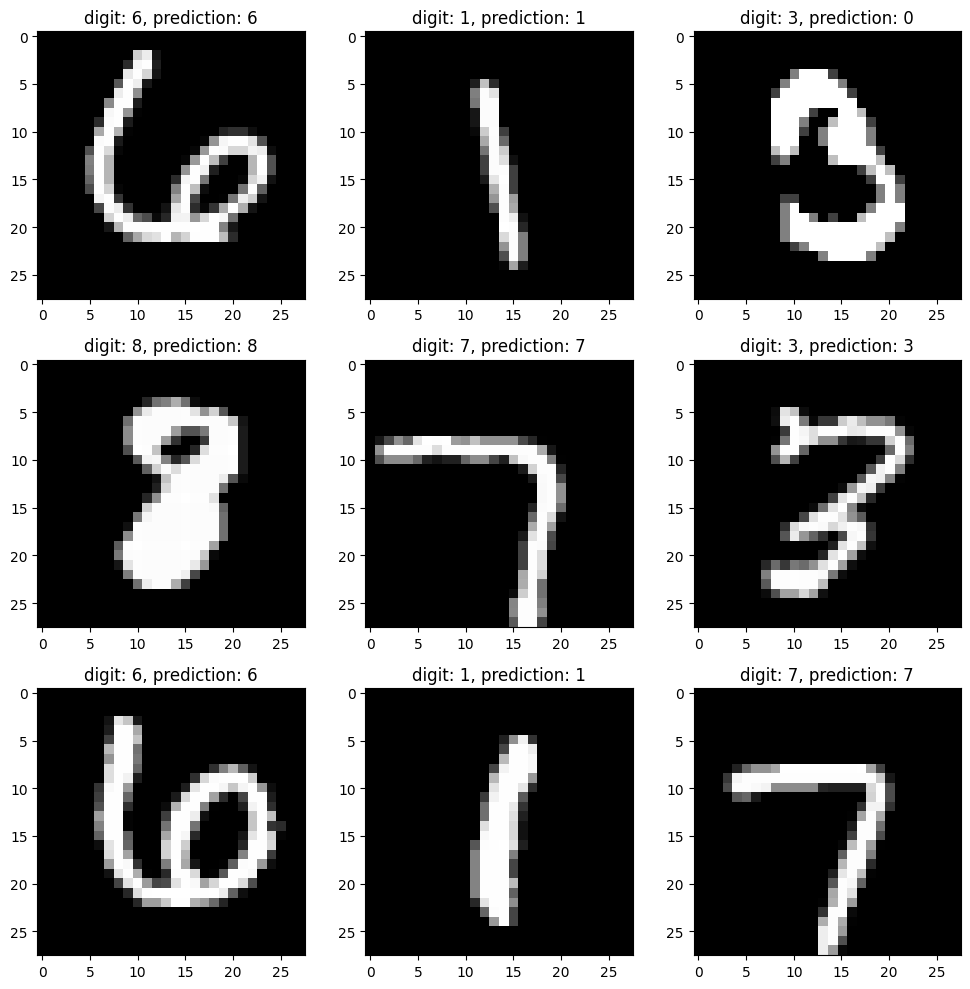

In [9]:
# Plotten einiger vom Modell vorhergesagten Ziffern 
predictAndPlot(model, test_data, test_verificarion_data)